In [1]:
# ==========================================
# 1. IMPORT LIBRARY & DATA
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv('4. Paris Housing.csv')

In [2]:
# ==========================================
# 2. DESKRIPSI DATA
# ==========================================
print("--- 5 Data Teratas ---")
display(df.head())
print("\n--- Statistik Deskriptif ---")
print(df.describe())

--- 5 Data Teratas ---


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury



--- Statistik Deskriptif ---
       squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29

In [3]:
# ==========================================
# 3. CEK DUPLIKASI & MISSING VALUE
# ==========================================
print(f"\nJumlah Duplikasi: {df.duplicated().sum()}")
print(f"Missing Values:\n{df.isnull().sum()}")


Jumlah Duplikasi: 0
Missing Values:
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64


In [4]:
# ==========================================
# 4. CEK TIPE DATA & PREPROCESSING AWAL
# ==========================================
print("\n--- Tipe Data Awal ---")
print(df.dtypes)

# Catatan: Kolom 'category' adalah object (string).
# Kita harus mengubahnya menjadi angka atau membuangnya untuk regresi.
# Di sini kita gunakan Label Encoding sederhana karena hanya ada 2 nilai (Basic/Luxury)
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])
# Hapus kolom asli 'category' agar sisa fitur numerik semua
df = df.drop(columns=['category'])


--- Tipe Data Awal ---
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object


C:\Users\31raf\AppData\Local\Temp\ipykernel_9192\3997287191.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['hasPool'], y=df['price'], palette='Set2')
C:\Users\31raf\AppData\Local\Temp\ipykernel_9192\3997287191.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['category_encoded'], y=df['price'], palette='viridis')


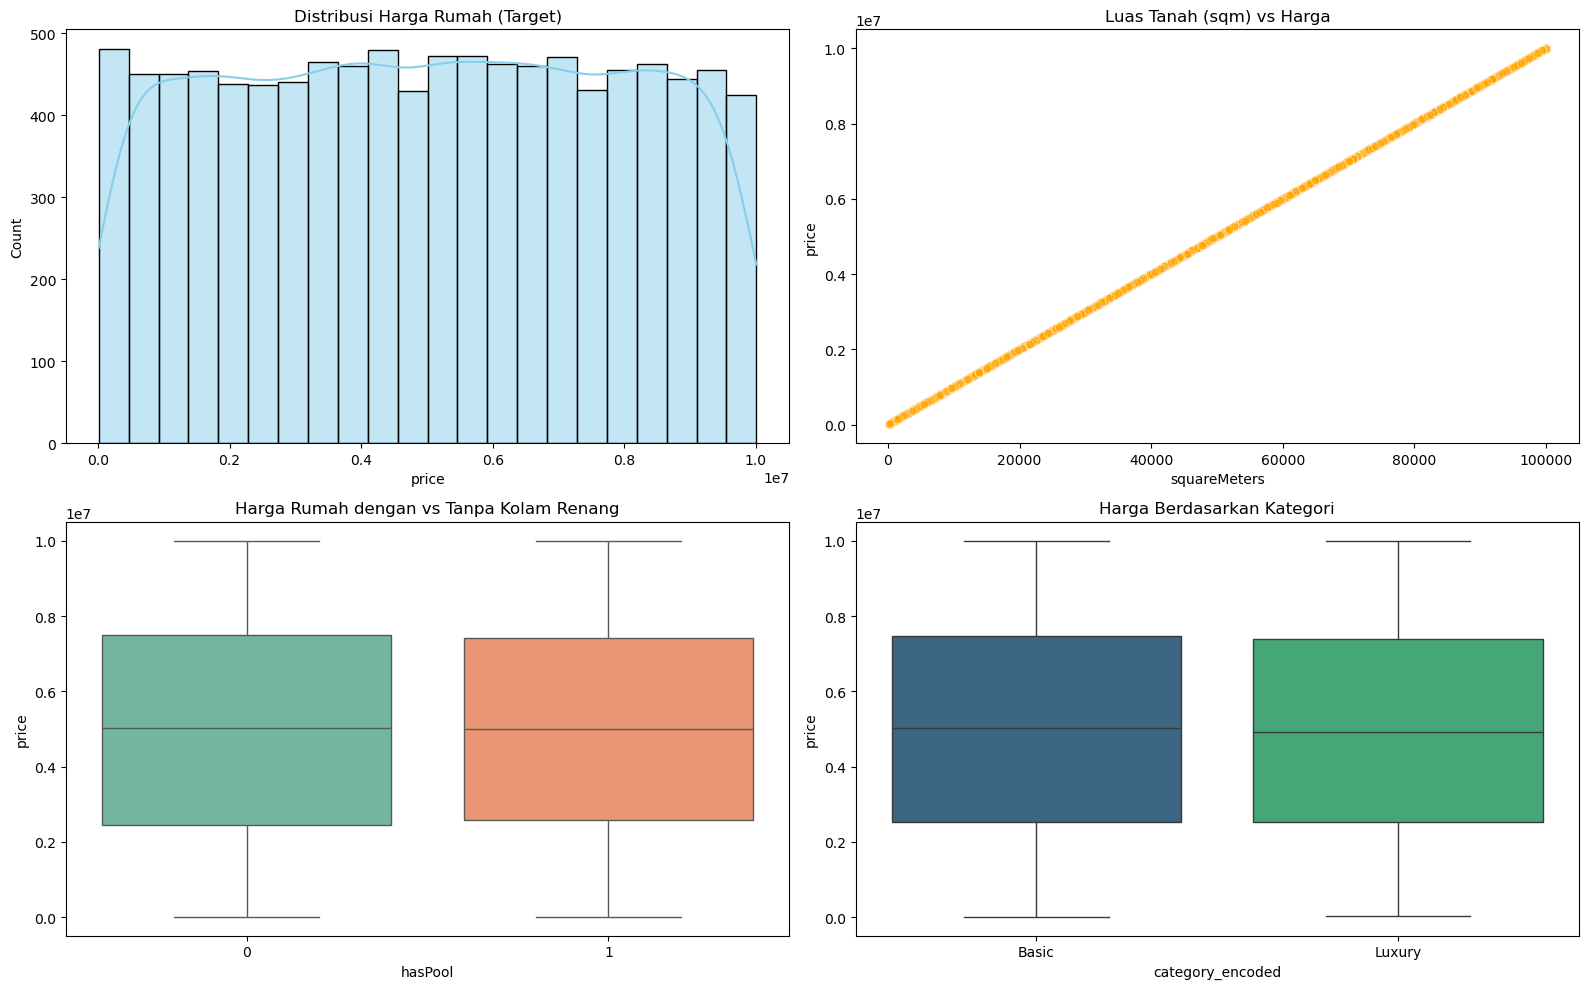

In [5]:
# ==========================================
# 5. EXPLORATORY DATA ANALYSIS (EDA) - 4 VISUALISASI
# ==========================================
plt.figure(figsize=(16, 10))

# Viz 1: Distribusi Target (Price)
plt.subplot(2, 2, 1)
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title('Distribusi Harga Rumah (Target)')

# Viz 2: Hubungan Luas vs Harga (Korelasi terkuat biasanya di sini)
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['squareMeters'], y=df['price'], alpha=0.5, color='orange')
plt.title('Luas Tanah (sqm) vs Harga')

# Viz 3: Pengaruh Kolam Renang terhadap Harga
plt.subplot(2, 2, 3)
sns.boxplot(x=df['hasPool'], y=df['price'], palette='Set2')
plt.title('Harga Rumah dengan vs Tanpa Kolam Renang')

# Viz 4: Distribusi Harga berdasarkan Kategori (Basic vs Luxury)
plt.subplot(2, 2, 4)
sns.boxplot(x=df['category_encoded'], y=df['price'], palette='viridis')
plt.xticks([0, 1], ['Basic', 'Luxury']) # Label manual berdasarkan hasil encoding
plt.title('Harga Berdasarkan Kategori')

plt.tight_layout()
plt.show()

In [6]:
# ==========================================
# 6. MEMBAGI VARIABEL X DAN Y
# ==========================================
X = df.drop('price', axis=1) # Semua kolom kecuali price adalah fitur
y = df['price']              # Target

In [7]:
# ==========================================
# 7. DETEKSI OUTLIER (Metode IQR)
# ==========================================
# Kita cek outlier hanya pada fitur 'squareMeters' sebagai contoh utama
Q1 = X['squareMeters'].quantile(0.25)
Q3 = X['squareMeters'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = X[(X['squareMeters'] < lower_bound) | (X['squareMeters'] > upper_bound)]
print(f"\nJumlah Outlier pada squareMeters: {len(outliers)}")
# Note: Untuk dataset Paris Housing ini, data seringkali sintetik dan bersih,
# namun langkah ini wajib ada dalam standar prosedur.


Jumlah Outlier pada squareMeters: 0


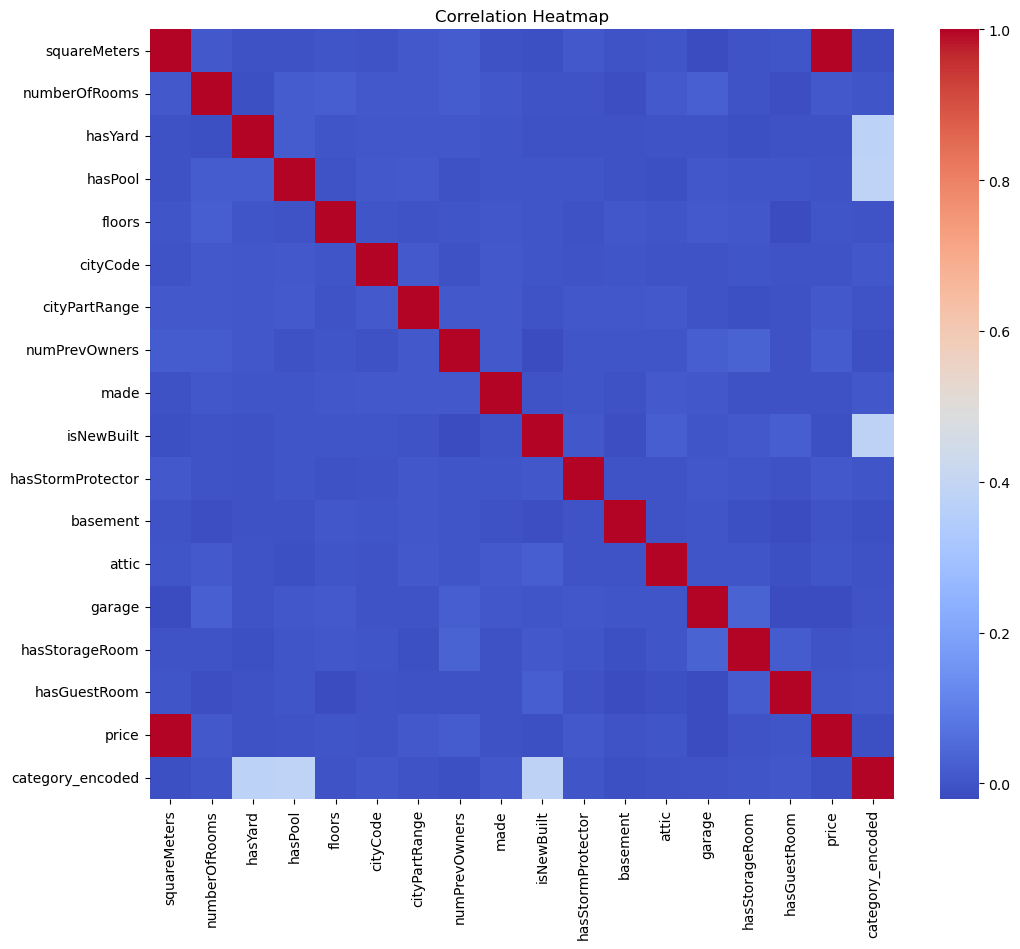


--- Nilai VIF (Top 5 Tertinggi) ---
          feature        VIF
8            made  39.017237
13         garage   5.557515
7   numPrevOwners   4.861166
6   cityPartRange   4.684990
12          attic   4.068528


In [8]:
# ==========================================
# 8. CEK KOLINEARITAS (HEATMAP & VIF)
# ==========================================
# a. Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False) # Annot False agar tidak penuh sesak
plt.title('Correlation Heatmap')
plt.show()

# b. VIF (Variance Inflation Factor)
# Mengambil sampel data jika dataset terlalu besar agar cepat
X_sample = X.sample(n=5000, random_state=42) if len(X) > 5000 else X
vif_data = pd.DataFrame()
vif_data["feature"] = X_sample.columns
vif_data["VIF"] = [variance_inflation_factor(X_sample.values, i) for i in range(len(X_sample.columns))]
print("\n--- Nilai VIF (Top 5 Tertinggi) ---")
print(vif_data.sort_values('VIF', ascending=False).head())

In [9]:
# ==========================================
# 9. TRAINING & TEST SPLIT
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# ==========================================
# 10. NORMALISASI
# ==========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# ==========================================
# 11. MODELING DENGAN REGRESI LINEAR
# ==========================================
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [12]:
# ==========================================
# 12. TUNING HYPERPARAMETER (Persiapan Ridge & Lasso)
# ==========================================
# Menentukan kandidat alpha (kekuatan regularisasi)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [13]:
# ==========================================
# 13. MODELING DENGAN RIDGE & LASSO
# ==========================================
# Ridge
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_

# Lasso
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_lasso.best_estimator_

print(f"\nBest Alpha Ridge: {grid_ridge.best_params_}")
print(f"Best Alpha Lasso: {grid_lasso.best_params_}")


Best Alpha Ridge: {'alpha': 0.01}
Best Alpha Lasso: {'alpha': 10}


In [14]:
# ==========================================
# 14. EVALUASI
# ==========================================
def evaluasi(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"MAE  : {mae:,.2f}")
    print(f"RMSE : {rmse:,.2f}")
    print(f"R2   : {r2:.4f}\n")

print("\n=== HASIL EVALUASI ===")
evaluasi("Linear Regression", y_test, y_pred_lr)
evaluasi("Ridge Regression", y_test, best_ridge.predict(X_test_scaled))
evaluasi("Lasso Regression", y_test, best_lasso.predict(X_test_scaled))


=== HASIL EVALUASI ===
--- Linear Regression ---
MAE  : 1,510.00
RMSE : 1,922.49
R2   : 1.0000

--- Ridge Regression ---
MAE  : 1,510.00
RMSE : 1,922.48
R2   : 1.0000

--- Lasso Regression ---
MAE  : 1,509.20
RMSE : 1,922.01
R2   : 1.0000

